# Chapter 10: Building Univariate Time Series Models Using Statistical Methods

## Technical requirements

1. Import basic libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import kpss, adfuller, seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse, rmspe
from sklearn.metrics import mean_absolute_percentage_error as mape

from itertools import product
from pathlib import Path

plt.rcParams['figure.figsize'] = (12, 6)

2. load data

In [3]:
path = './data/num_file/hrs_1/p040.csv'
data = pd.read_csv(path)
data['datetime'] = pd.to_datetime(data['date'])+pd.to_timedelta(data['hour'], unit='h')
data = data.drop(['date', 'hour'], axis=1)
data.set_index('datetime', inplace=True)
data.columns=['value']
data['value'] = data['value'].astype(float)
print(data)

                       value
datetime                    
2022-04-21 01:00:00   1033.0
2022-04-21 02:00:00     65.0
2022-04-21 12:00:00   1604.0
2022-04-25 15:00:00   4458.0
2022-04-25 16:00:00  18501.0
...                      ...
2022-09-03 07:00:00   9741.0
2022-09-03 08:00:00  19613.0
2022-09-03 09:00:00  22055.0
2022-09-03 10:00:00  14644.0
2022-09-03 11:00:00  12751.0

[3144 rows x 1 columns]


<Axes: xlabel='datetime'>

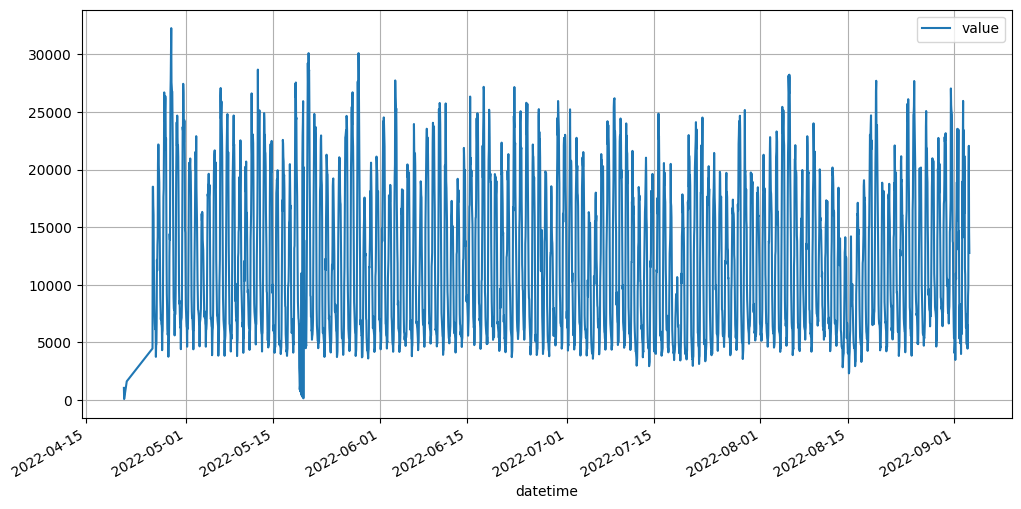

In [6]:
data.plot(grid=True)

3. split_data

In [7]:
def split_data(data, test_split):
    l = len(data)
    train = data.iloc[:int(l*(1-test_split))]
    test = data.iloc[int(l*(1-test_split)):]
    print(f"Train: {len(train)}, Test: {len(test)}")
    return train, test

In [8]:
test_split = 0.15
train, test = split_data(data, test_split)

Train: 2672, Test: 472
